In [1]:
!pip install Twython

In [146]:
from twython import Twython, TwythonError
import datetime
import pandas as pd
import networkx as nx
import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns

In [3]:
# open the keys file
my_file = open("keys.txt", "r")

# read the raw data
content = my_file.read()

# split all lines by  newline character
API_KEY, API_SECRET_KEY = content.split("\n")

# close the file
my_file.close()

In [4]:
twitter = Twython(API_KEY, API_SECRET_KEY)

authentication_tokens = twitter.get_authentication_tokens()
print(authentication_tokens['auth_url'])

https://api.twitter.com/oauth/authenticate?oauth_token=vwGNRAAAAAABY6wVAAABfwzP1fQ


In [5]:
VERIFIER = '7753651'

twitter = Twython(API_KEY, API_SECRET_KEY,
                  authentication_tokens['oauth_token'],
                  authentication_tokens['oauth_token_secret'])

authorized_tokens = twitter.get_authorized_tokens(VERIFIER)

In [6]:
twitter = Twython(API_KEY, API_SECRET_KEY,
                  authorized_tokens['oauth_token'],
                  authorized_tokens['oauth_token_secret'])

# twitter.verify_credentials()

In [ ]:
twitter.verify_credentials()

In [13]:
D = nx.DiGraph()
dict_ = {'id_retweet': [], 'retweeted_screen_name': [], 'retweeted_location': [], 'retweeter_screen_name': [], 'retweeter_location' : []}

# Getting today's date
datestamp = datetime.datetime.now().strftime("%Y-%m-%d")
import itertools

NUM_TWEETS_TO_FETCH = 15000

cursor = twitter.cursor(twitter.search, q='#BBB', count=100, result_type='mixed')
search_tweets = []
#search_tweets = list(itertools.islice(cursor, NUM_TWEETS_TO_FETCH))
#len(search_tweets)
for ii in range(4): # loop para coletar dados a cada 16 minutos
    search_tweets.extend(list(itertools.islice(cursor, NUM_TWEETS_TO_FETCH)))
    time.sleep(16 * 60)

print(len(search_tweets))
retweets = []
for tweet in search_tweets:
    if 'retweeted_status' in tweet:
        retweets.append(tweet)
print("filter ", len(retweets))

60000
filter  21322


In [14]:
for retweet in retweets:
    retweeted_status = retweet['retweeted_status']

    retweeted_sn = retweeted_status['user']['screen_name']
    retweetedL = retweeted_status['user']['location']
    retweeter_sn = retweet['user']['screen_name']
    retweeterL = retweet['user']['location']

    dict_['id_retweet'].append(retweet["id"])
    dict_['retweeted_screen_name'].append(retweeted_sn)
    dict_['retweeted_location'].append(retweetedL)
    dict_['retweeter_screen_name'].append(retweeter_sn)
    dict_['retweeter_location'].append(retweeterL)
  
    # Edge direction: retweeted_sn -> retweeter_sn
    if D.has_edge(retweeted_sn, retweeter_sn):
        D.edges[retweeted_sn, retweeter_sn]['weight'] += 1
    else:
        D.add_edge(retweeted_sn, retweeter_sn, weight=1)

In [15]:
df = pd.DataFrame(dict_)

df.head()


,id_retweet,retweeted_screen_name,retweeted_location,retweeter_screen_name,retweeter_location
0,1494682463733485571,ei__lila,,carla_rayana,Belém - Pará
1,1494682384905736200,ei__lila,,whymadu,sccp • rmcf
2,1494682315926220811,ei__lila,,PryscyllaSanto7,
3,1494682305918607368,ei__lila,,Derekkmt,Brazil
4,1494682285601398784,epocadebbb,"Curitiba, Brasil",Lel20950324,


In [190]:
locations = []
retweeted_location = df['retweeted_location'].value_counts()
retweeter_location = df['retweeter_location'].value_counts()
# for key, value in :
#   locations.append([key, value])
# location = pd.DataFrame(locations, columns=["retweeted_location", "retweeter_location"])
# location


In [214]:
retweeted_location.head().keys()

Index(['Sem Loc', 'São Paulo, Brasil', 'Rio de Janeiro, Brasil', 'Brasil',
       'Flop'],
      dtype='object')

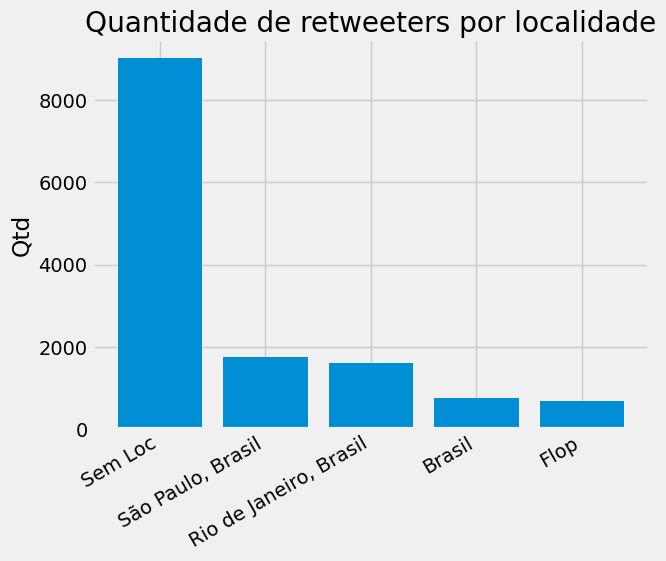

In [265]:
fig, ax = plt.subplots()

p1 = ax.bar(retweeted_location.head().keys(),retweeted_location.head())
# p2 = ax.bar(retweeter_location.head().keys(),retweeter_location.head())
ax.set_ylabel('Qtd')
ax.set_title('Quantidade de retweeters por localidade')
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

plt.show()

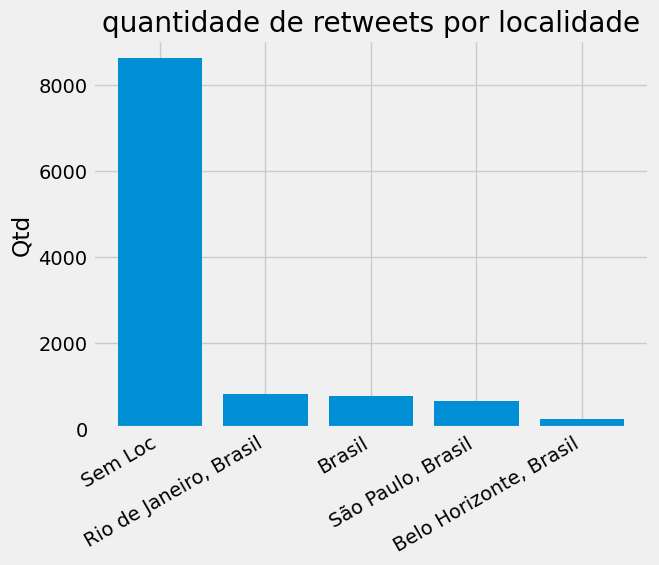

In [262]:
fig, ax = plt.subplots()

# p1 = ax.bar(retweeted_location.head().keys(),retweeted_location.head())
p2 = ax.bar(retweeter_location.head().keys(),retweeter_location.head())
ax.set_ylabel('Qtd')
ax.set_title('quantidade de retweets por localidade')
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

plt.show()

In [17]:
df.to_csv("BBB-"+"2022-02-18"+".csv")
nx.write_graphml(D, "BBB-"+"2022-02-18"+".graphml")

In [12]:
# Verificando a quantidade de requests restantes
twitter.get_application_rate_limit_status()['resources']['search']

{'/search/tweets': {'limit': 180, 'remaining': 180, 'reset': 1645193786}}

In [ ]:
from operator import itemgetter

sorted(D.out_degree(), key=itemgetter(1), reverse=True)

In [45]:
Df18 = nx.read_graphml("BBB-2022-02-18.graphml")
Df17 = nx.read_graphml("BBB-2022-02-17.graphml")
Df16 = nx.read_graphml("BBB-2022-02-16.graphml")
Df15 = nx.read_graphml("BBB-2022-02-15.graphml")
Df14 = nx.read_graphml("BBB-2022-02-14.graphml")
Df13 = nx.read_graphml("BBB-2022-02-13.graphml")
Df12 = nx.read_graphml("BBB-2022-02-12.graphml")

In [160]:
dicts = [Df18, Df17, Df16, Df15, Df14, Df13, Df12]
datas = []
for dic in dicts:
  closenessDict = nx.closeness_centrality(dic)
  closenessArray = []

  for key, value in dict(closenessDict).items():
      closenessArray.append([key, value])
  closenessDF = pd.DataFrame(closenessArray, columns=["screen_name", "closeness"])

  closenessDF = closenessDF.sort_values(by="closeness", ascending=False)
  datas.append(closenessDF.head(5))

In [161]:
result = pd.concat(datas)

In [141]:
result

,screen_name,closeness
332,MeDefineDenise,0.001728
373,AikoLin14,0.001446
637,thatha_klabro,0.002590
12,thatha_klabro,0.003123
825,thatha_klabro,0.002360
974,crispustifag,0.002344
96,LuizCoutoES,0.004156


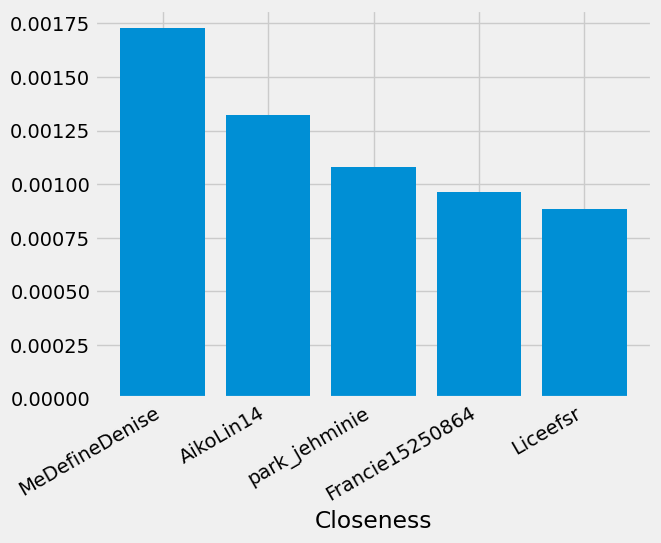

          screen_name  closeness
332    MeDefineDenise   0.001728
1171        AikoLin14   0.001324
527     park_jehminie   0.001078
6469  Francie15250864   0.000962
5009         Liceefsr   0.000886


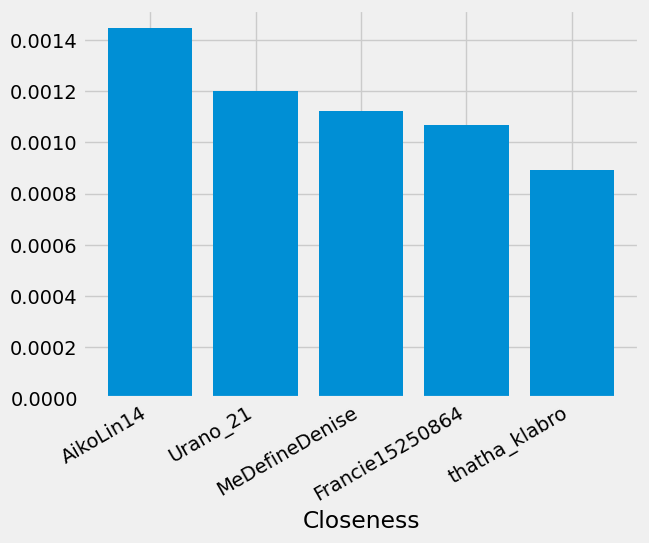

          screen_name  closeness
373         AikoLin14   0.001446
119          Urano_21   0.001199
1800   MeDefineDenise   0.001122
1676  Francie15250864   0.001068
1369    thatha_klabro   0.000893


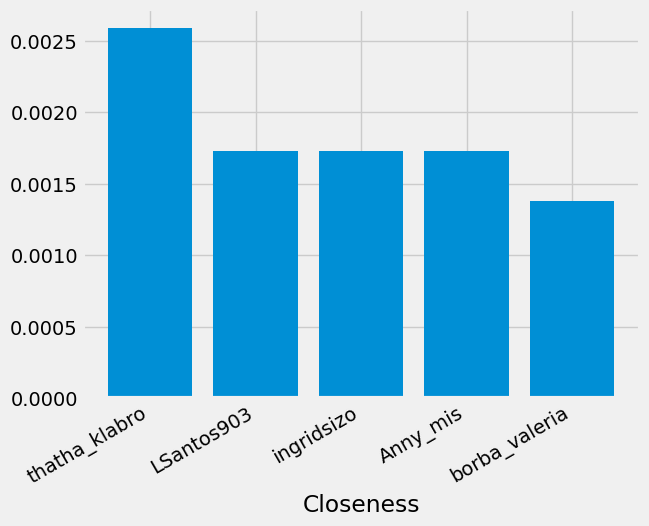

       screen_name  closeness
637  thatha_klabro   0.002590
132     LSantos903   0.001726
775     ingridsizo   0.001726
176       Anny_mis   0.001726
924  borba_valeria   0.001381


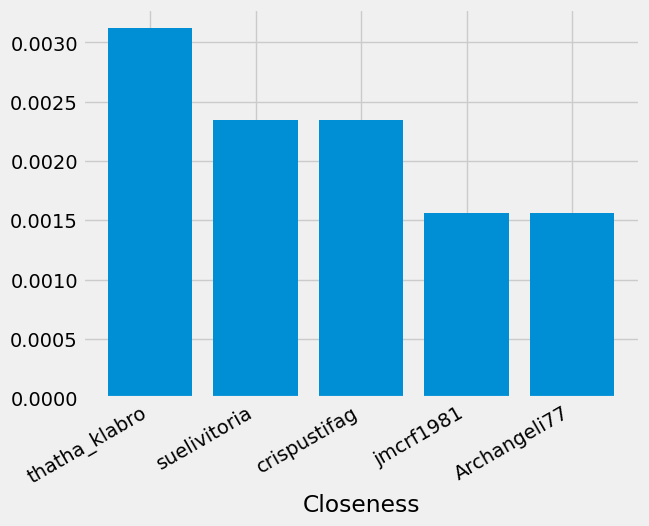

       screen_name  closeness
12   thatha_klabro   0.003123
34    suelivitoria   0.002342
977   crispustifag   0.002342
557      jmcrf1981   0.001561
548   Archangeli77   0.001561


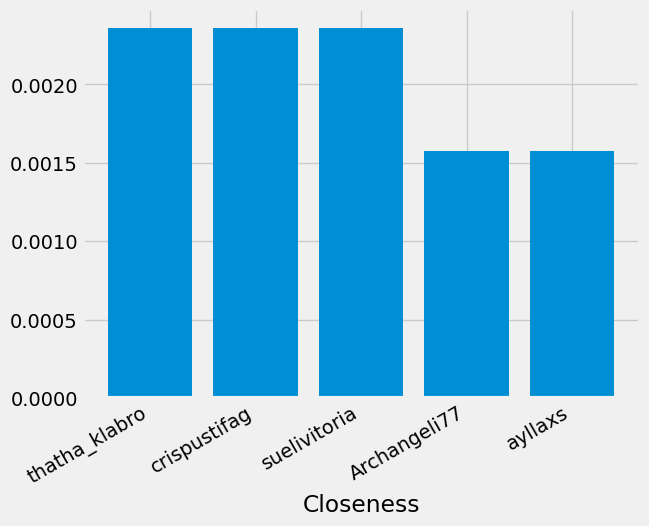

       screen_name  closeness
825  thatha_klabro   0.002360
966   crispustifag   0.002360
26    suelivitoria   0.002360
536   Archangeli77   0.001574
886        ayllaxs   0.001574


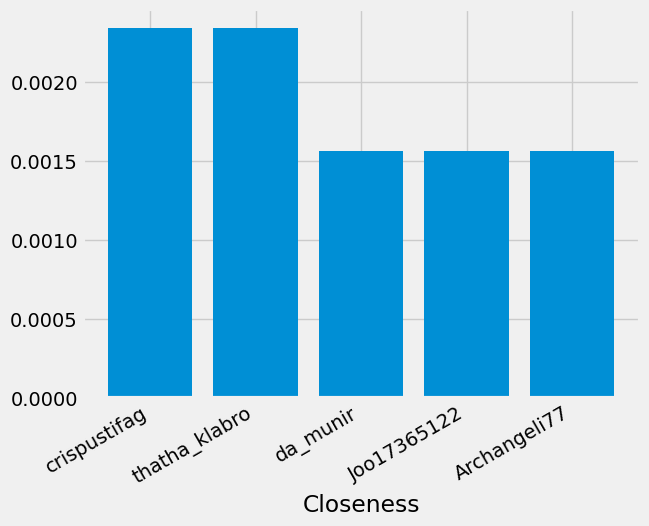

       screen_name  closeness
974   crispustifag   0.002344
834  thatha_klabro   0.002344
424       da_munir   0.001563
275    Joo17365122   0.001563
545   Archangeli77   0.001563


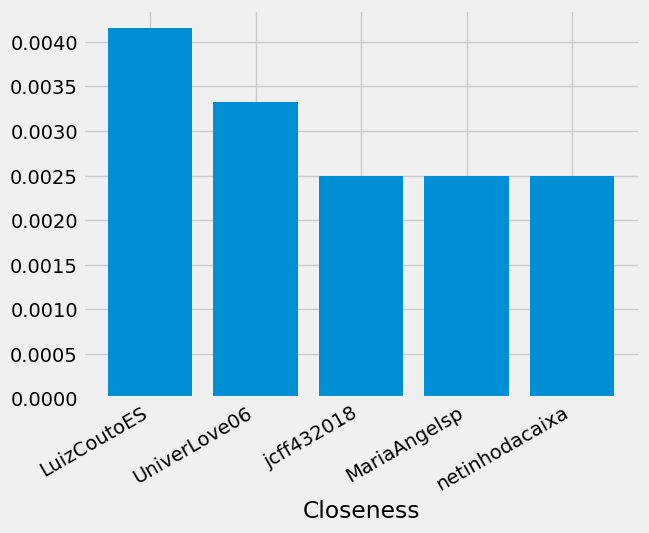

        screen_name  closeness
96      LuizCoutoES   0.004156
115    UniverLove06   0.003325
614      jcff432018   0.002494
264    MariaAngelsp   0.002494
375  netinhodacaixa   0.002494


In [168]:
import matplotlib.pyplot as plt
import numpy as np
for i in datas:
  fig, ax = plt.subplots()
  ax.bar(i.screen_name, i.closeness, align='center')
  plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
  ax.set_xlabel('Closeness')
  plt.show()
  print(i)


  

In [158]:
degree_sequence = sorted([d for n, d in Df18.degree()], reverse=True)

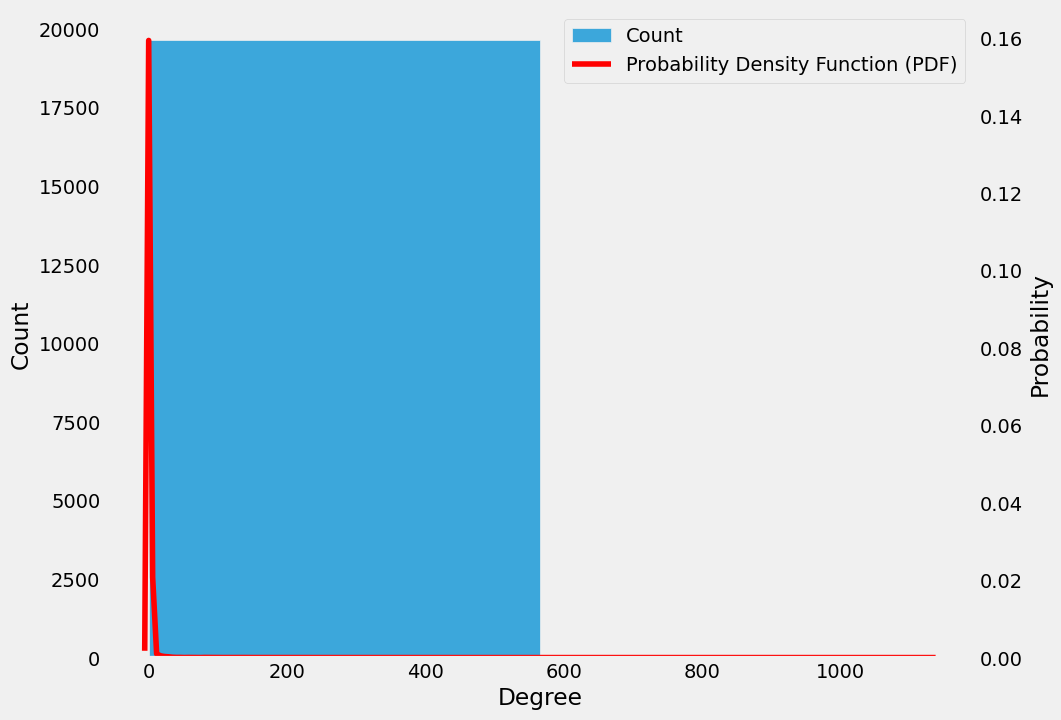

In [156]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=2,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()